In [1]:
# problem Statement: Calculate price for the car "Volk" with respect to horse power

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv("./dataset/car_data.csv")

In [4]:
df.shape

(11914, 16)

In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.Make.value_counts()

Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyke

In [8]:
df.Make.nunique()

48

In [9]:
volk_df = df[df['Make'] == 'Volkswagen']
volk_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1792,Volkswagen,Beetle Convertible,2014,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,2.0,NaN,Compact,Convertible,32,24,873,27295
1793,Volkswagen,Beetle Convertible,2014,premium unleaded (recommended),210.0,4.0,AUTOMATED_MANUAL,front wheel drive,2.0,Performance,Compact,Convertible,29,23,873,31795
1794,Volkswagen,Beetle Convertible,2014,premium unleaded (recommended),210.0,4.0,AUTOMATED_MANUAL,front wheel drive,2.0,Performance,Compact,Convertible,29,23,873,34895
1795,Volkswagen,Beetle Convertible,2014,regular unleaded,170.0,5.0,AUTOMATIC,front wheel drive,2.0,NaN,Compact,Convertible,27,21,873,27295
1796,Volkswagen,Beetle Convertible,2014,diesel,140.0,4.0,AUTOMATED_MANUAL,front wheel drive,2.0,Diesel,Compact,Convertible,41,28,873,32755


In [10]:
volk_df.shape

(809, 16)

In [11]:
volk_df.isnull().sum()

Make                   0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              0
Engine Cylinders       4
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Market Category      224
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64

In [12]:
volk_df = volk_df.dropna()

In [13]:
volk_df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [14]:
volk_df = volk_df[['Engine HP','MSRP']]

In [15]:
volk_df.dtypes

Engine HP    float64
MSRP           int64
dtype: object

In [16]:
volk_df['MSRP'] = volk_df['MSRP'].astype(dtype='float64')

In [17]:
x = np.array(volk_df[['Engine HP']])
y = np.array(volk_df[['MSRP']])

In [18]:
y.shape

(581, 1)

In [19]:
import sklearn
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)
# the threshold for random state is 50 after that it start decresing R2 value

In [21]:
x_test.shape

(117, 1)

In [22]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
p = lr.predict(x_test)

In [25]:
r2 = lr.score(x_train,y_train)
r2

0.5609644448849571

In [26]:
from sklearn.metrics import r2_score,mean_squared_error

In [27]:
p = lr.predict(x_test)
print('R2 score: %.2f' % r2_score(y_test,p))

R2 score: 0.75


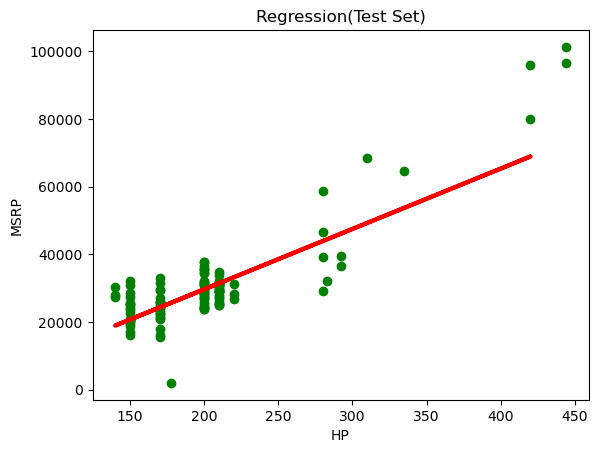

In [28]:
plt.scatter(x_test,y_test,color="green") # Plot a graph with X_test vs y_test
plt.plot(x_train,lr.predict(x_train),color="red",linewidth=3) # Regressior line showing
plt.title('Regression(Test Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [29]:
print('Mean Error :',mean_squared_error(y_test,p)) # Priniting the mean error

Mean Error : 51906265.89994918


In [30]:
def car_price(hp): # A function to predict the price according to Horse power
    result = lr.predict(np.array(hp).reshape(1, -1))
    return(result[0,0])

In [31]:
car_hp = int(input('Enter Volkswagen cars Horse Power : '))
print('This Volkswagen Price will be : ',int(car_price(car_hp))*69,'₹')

Enter Volkswagen cars Horse Power : 1000
This Volkswagen Price will be :  11898084 ₹
